## 로지스틱 회귀 모델 학습 및 성능 평가 

##### 학습/평가 데이터 분리

In [ ]:
# 측정 데이터와 레이블(정답) 분리
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1:].values
y = np.where(y =='OK',1,0)
y = y.ravel() # 레이블을 1차원으로 변경함.
print(X.shape, y.shape)

(9383, 4) (9383,)


In [ ]:
# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 0]))

5586
982
2382
433


In [ ]:
new_y_train = y_train[y_train == 1][:len(y_train[y_train == 0])]
new_y_train = np.concatenate([new_y_train, y_train[y_train == 0]])
new_y_train

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
new_X_train = X_train[y_train == 1][:len(y_train[y_train == 0])]
new_X_train = np.concatenate([new_X_train, X_train[y_train == 0]])
new_X_train

array([[  0.,   0., 526., 584.],
       [  0.,   0., 571., 526.],
       [  0.,   0., 294., 314.],
       ...,
       [  0.,   0., 581., 580.],
       [  1.,   1., 521., 303.],
       [  0.,   0., 558., 573.]])

##### 모델 성능 평가 - 1) 분류성능평가지표

> 정량평가: 오차행렬, 정확도, 정밀도, 재현율, F1 score, AUC 살펴보기

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [ ]:
def get_clf_eval(y_test=None, pred=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3: .4f}, AUC:{4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))

> 정성평가: 그래프 살펴보기

In [ ]:
import matplotlib.pyplot as plt
def draw_graph(y_test=None, pred=None):
  plt.figure(figsize=(40, 9))
  plt.plot(y_test, 'b', label = 'actual')
  plt.plot(pred, 'r', label = 'prediction')
  plt.legend()
  plt.show()

  # 따로 보기
  # plt.figure(figsize = (30,6)) # Plotting
  # plt.plot(y_test, 'b', label = 'actual')
  # plt.legend()
  # plt.show()
  # plt.figure(figsize=(30, 6))
  # plt.plot(pred, 'r', label = 'prediction')
  # plt.legend()
  # plt.show()

##### 모델 성능 평가 -2) ROC curve와 case별로 살펴보기 

In [ ]:
def get_eval_2(y_test=None, pred=None):
  confusion = confusion_matrix(y_test, pred)
  TN = confusion[0][0]
  FP = confusion[0][1]
  FN = confusion[1][0]
  TP = confusion[1][1]
  print("📌실제 불량일 때 불량으로 판별할 확률\n= P(실제불량)∩P(에측불량)/P(실제불량): {:.4f}".format(TN/(TN+FP)))
  #print("📌실제 불량일 때 양품으로 판별할 확률\n= P(실제불량)∩P(에측양품)/P(실제불량): {:.4f}".format(FP/(TN+FP)))
  #print("📌실제 양품일 때 불량으로 판별할 확률\n= P(실제양품)∩P(에측불량)/P(실제양품): {:.4f}".format(FN/(FN+TP)))
  print("📌실제 양품일 때 양품으로 판별할 확률\n= P(실제양품)∩P(에측양품)/P(실제양품): {:.4f}".format(TP/(FN+TP)))

  roc_auc = roc_auc_score(y_test, pred)
  print('ROC_AUC:{:.4f}'.format(roc_auc))
  return(TN/(TN+FP),TP/(FN+TP),roc_auc)

#####  모델 학습 및 성능 평가

In [ ]:
# Scikit-learn 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
proba = lr.predict_proba(X_test)
print(lr.classes_)
print(proba)
lr_model = lr.predict(X_test).flatten()
get_clf_eval(y_test,lr_model)
get_eval_2(y_test, lr_model)

[0 1]
[[0.11517863 0.88482137]
 [0.11559126 0.88440874]
 [0.09038094 0.90961906]
 ...
 [0.18220977 0.81779023]
 [0.14680224 0.85319776]
 [0.09081707 0.90918293]]
오차 행렬
[[  22  411]
 [   0 2382]]
정확도:  0.8540, 정밀도:  0.8528, 재현율:  1.0000, F1:  0.9206, AUC: 0.5254
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.0508
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 1.0000
ROC_AUC:0.5254


(0.050808314087759814, 1.0, 0.5254041570438799)

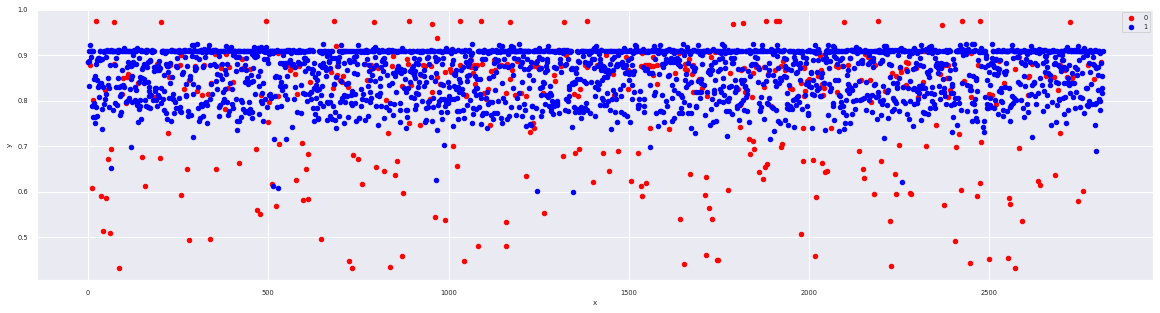

In [ ]:
data = pd.DataFrame({'x': range(0, len(X_test)), 
                     'y': np.array(proba).T[1], 
                     'group':y_test})

fig,ax = plt.subplots(figsize=(20,5))
colors = ['red', 'blue']
for i, (name, group) in enumerate(data.groupby('group')):
  group.plot(ax=ax,
             kind = 'scatter',
             x='x',
             y='y',
             color = colors[i],
             label = name,
            #  marker='o', 
            #   s=6, 
        
             )


In [ ]:
new_lr = []
for i in range(len(proba)):
  if proba[i][1]>0.8:
    new_lr.append(1)
  else:
    new_lr.append(0)

get_clf_eval(y_test,new_lr)
get_eval_2(y_test, new_lr)

오차 행렬
[[ 150  283]
 [ 441 1941]]
정확도:  0.7428, 정밀도:  0.8728, 재현율:  0.8149, F1:  0.8428, AUC: 0.5806
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.3464
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.8149
ROC_AUC:0.5806


(0.3464203233256351, 0.8148614609571788, 0.580640892141407)

사이킷런의 LogisticRegression 클래스 -> 이진 분류의 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 작으면 음성 클래스로 판단

In [ ]:
n_samples = 6568
n_classes = 2
n_sample0= 982
n_sample1= 5586
w0= n_samples/(n_classes*n_sample0)
w1= n_samples/(n_classes*n_sample1)
print(w0,w1)

3.344195519348269 0.5878983172216254


In [ ]:
# Scikit-learn 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1',class_weight={0:w0,1:w1},C=0.01, solver='liblinear', max_iter=5000).fit(X_train, y_train)
proba = model.predict_proba(X_test)
lr_model = model.predict(X_test).flatten()
get_clf_eval(y_test,lr_model)
get_eval_2(y_test, lr_model)

오차 행렬
[[ 285  148]
 [ 905 1477]]
정확도:  0.6259, 정밀도:  0.9089, 재현율:  0.6201, F1:  0.7372, AUC: 0.6391
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.6582
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.6201
ROC_AUC:0.6391


(0.6581986143187067, 0.6200671704450041, 0.6391328923818553)

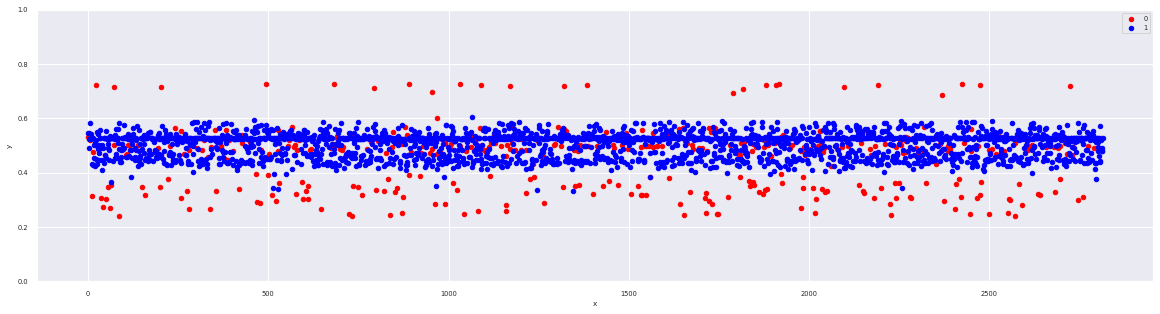

In [ ]:
data = pd.DataFrame({'x': range(0, len(X_test)), 
                     'y': np.array(proba).T[1], 
                     'group':y_test})

fig,ax = plt.subplots(figsize=(20,5))
colors = ['red', 'blue']
for i, (name, group) in enumerate(data.groupby('group')):
  group.plot(ax=ax,
             kind = 'scatter',
             x='x',
             y='y',
             color = colors[i],
             label = name,
            #  marker='o', 
            #   s=6, 
             ylim = (0,1)
             )

In [ ]:
proba = model.predict_proba(X_test)
new_lr = []
for i in range(len(proba)):
  if proba[i][1]>0.3:
    new_lr.append(1)
  else:
    new_lr.append(0)

get_clf_eval(y_test,new_lr)
get_eval_2(y_test, new_lr)

In [ ]:
# 하이퍼 파라미터 최적화 진행하기 - 전처리안했을 때
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression().fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

params = {'penalty':['l1', 'l2','elasticnet', None], 
          'C':[0.01, 0.1,1,5,10],
          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
          'class_weight':[{0:w0,1:w1},{0:1,1:1}],
          'max_iter':[100,500,1000,2000,3000,5000]
          }
grid_clf =  GridSearchCV(lr_clf, param_grid=params, scoring='roc_auc', cv=3)
grid_clf.fit(data_scaled, y) 

In [ ]:
grid_clf.best_params_, grid_clf.best_score_

({'C': 10,
  'class_weight': {0: 3.344195519348269, 1: 0.5878983172216254},
  'max_iter': 2000,
  'penalty': 'l2',
  'solver': 'sag'},
 0.5083856936933021)

In [ ]:
# 하이퍼 파라미터 최적화 진행하기 - 전처리 했을 때
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression().fit(X_train_2, y_train_2)
lr_preds = lr_clf.predict(X_test_2)

params = {'penalty':['l1', 'l2','elasticnet', None], 
          'C':[0.01, 0.1,1,5,10],
          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
          'class_weight':[{0:w0,1:w1},{0:1,1:1}],
          'max_iter':[100,500,1000,2000,3000,5000]
          }
grid_clf =  GridSearchCV(lr_clf, param_grid=params, scoring='roc_auc', cv=3)
grid_clf.fit(data_scaled, y) # grid_clf.fit(data_scaled, cancer.target)
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_scaled, y, test_size = 0.3, random_state=100)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [ ]:
grid_clf.best_params_, grid_clf.best_score_

({'C': 0.1,
  'class_weight': {0: 3.344195519348269, 1: 0.5878983172216254},
  'max_iter': 2000,
  'penalty': None,
  'solver': 'sag'},
 0.5083769163658484)